In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Hyper-parameters
INPUT_SIZE = 1
OUTPUT_SIZE = 1
NUM_EPOCHS = 10
LEARNING_RATE = 0.1
BATCH_SIZE = 64
n = 11500

In [38]:
# Toy dataset
x_train = np.linspace(0, n, n).astype(np.float32).reshape((-1,1))
# Scale the inputs; failing to do this results in NaN values for the loss.
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
y_train = x_train * x_train * x_train + np.random.normal(0,.02, n).astype(np.float32).reshape((-1,1))
y_train = (y_train - np.min(y_train))/(np.max(y_train) - np.min(y_train))

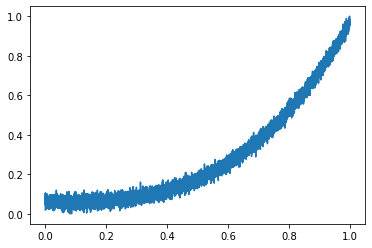

In [39]:
plt.plot(x_train, y_train)

In [40]:
class MLPModel(nn.Module):
    def __init__(self, input_size, output_size, dropout=0.0, n_hid=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, n_hid),
            nn.ReLU(),          
            nn.Linear(n_hid, n_hid//2),
            nn.ReLU(),
            nn.Linear(n_hid//2, output_size),
        )
        for m in self.model:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, input_tensor):
        return self.model(input_tensor)

In [41]:
# Linear regression model
model =  MLPModel(INPUT_SIZE, OUTPUT_SIZE)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  

In [42]:
# Train the model
for epoch in range(NUM_EPOCHS):
    
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
    permutation = torch.randperm(torch.from_numpy(x_train).size()[0])
    
    for i in range(0,torch.from_numpy(x_train).size()[0], BATCH_SIZE):
    
        indices = permutation[i:i+BATCH_SIZE]
        inputs, targets = x_train[indices], y_train[indices]
    
        # Convert numpy arrays to torch tensors
        inputs = torch.from_numpy(inputs)
        targets = torch.from_numpy(targets)

        # Forward pass
        outputs = model.forward(inputs)
        loss = criterion(outputs, targets)
    
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [10/10], Loss: 0.0005


In [81]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data', alpha = 0.3)
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #4 'mat1'

### More Complex Example
Based on https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379.

In [105]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    print(loss.data.numpy())

0.66285133
0.43819466
0.3117718
0.17632224
0.12717159
0.10064735
0.09066161
0.085691124
0.083040416
0.08118706
0.079666175
0.07827528
0.07693347
0.07561132
0.07430422
0.07300966
0.07171701
0.070425175
0.06913859
0.06786153
0.06658451
0.065307416
0.064030744
0.06276049
0.061494976
0.060229983
0.05896732
0.057710197
0.056462917
0.05522812
0.05399747
0.05277167
0.05155251
0.050344665
0.049144074
0.04795549
0.046779197
0.045612663
0.04446102
0.04332707
0.042205803
0.041098125
0.04000489
0.0389302
0.03788206
0.03685354
0.035842206
0.03484869
0.03387366
0.0329206
0.03199263
0.03108482
0.03019855
0.029334364
0.028491393
0.027669989
0.026870983
0.026093591
0.025337977
0.024605408
0.023897208
0.023212621
0.022549432
0.021909565
0.02129408
0.02069923
0.020124804
0.019570578
0.019036273
0.018521598
0.018026238
0.017549999
0.017092947
0.016653651
0.016231224
0.015825912
0.01543731
0.015064969
0.014708454
0.014367323
0.014041121
0.013729387
0.013431652
0.013147466
0.01287636
0.012618448
0.012373272

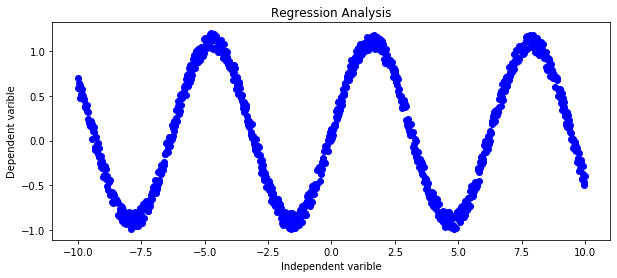

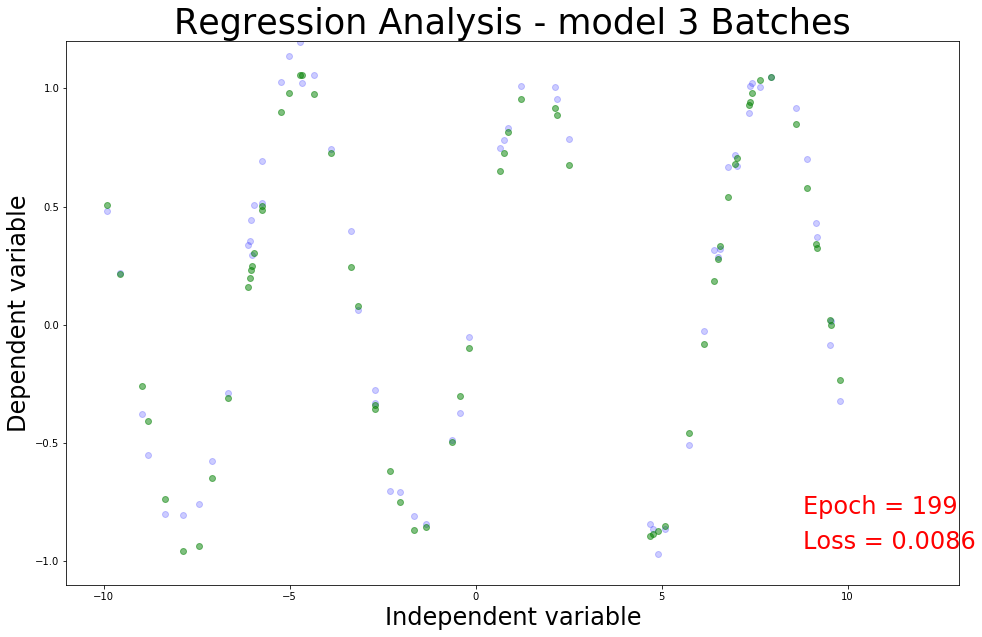

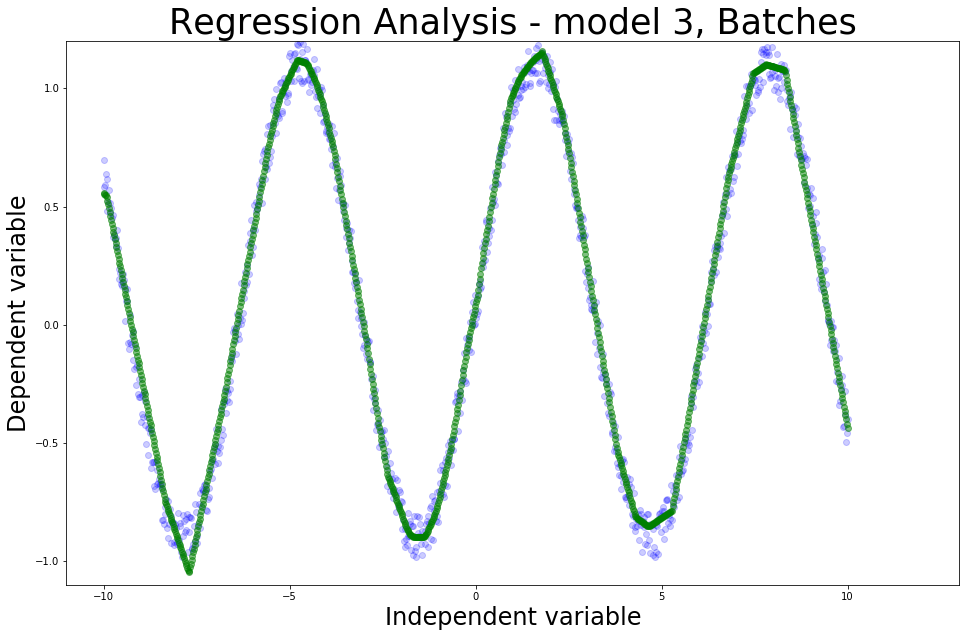

In [106]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('curve_2.png')
plt.show()

# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('curve_2_model_3_batches.png')
plt.show()
